In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import allplayers_wrangle as wr

# plotting defaults
plt.rc('figure', figsize=(16, 8))
plt.style.use('dark_background')
plt.rc('font', size=16)

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression

import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

In [2]:
def get_players_stats():
    stats = pd.read_csv('stats.csv')
    return stats.set_index('Player').sort_index(ascending=True)

In [3]:
stats = wr.get_players_stats()
stats

,Rk,Age,Team,GP,GS,MP,FG,FGA,2P,2PA,...,TOV,PF,PPG,FG_PCT,2P_PCT,3P_PCT,FT_PCT,TS_PCT,eFG_PCT,Pos
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Brooks,65,33,MIN,32,1,5.90,0.90,2.20,0.50,1.20,...,0.30,0.90,2.30,0.41,0.45,0.35,0.73,0.51,0.49,G
Aaron Gordon,180,22,ORL,58,57,32.90,6.50,14.90,4.50,9.00,...,1.80,1.90,17.60,0.43,0.50,0.34,0.70,0.53,0.50,F
Aaron Harrison,202,23,DAL,9,3,25.90,2.10,7.70,1.10,2.90,...,0.30,3.00,6.70,0.28,0.39,0.21,0.77,0.39,0.34,G
Aaron Jackson,244,31,HOU,1,0,35.00,3.00,9.00,2.00,5.00,...,1.00,4.00,8.00,0.33,0.40,0.25,0.50,0.41,0.39,G
Abdel Nader,363,24,BOS,48,1,10.90,1.00,3.10,0.60,1.80,...,0.70,0.90,3.00,0.34,0.32,0.35,0.59,0.44,0.41,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Randolph,422,36,SAC,59,57,25.60,6.10,12.90,5.30,10.40,...,2.00,2.00,14.50,0.47,0.50,0.35,0.79,0.53,0.51,F-C
Zaza Pachulia,387,33,GSW,69,57,14.10,2.20,3.80,2.20,3.80,...,1.00,1.80,5.40,0.56,0.57,0.00,0.81,0.61,0.56,C
Zhou Qi,418,22,HOU,18,0,6.90,0.30,1.80,0.20,0.70,...,0.60,0.80,1.20,0.19,0.31,0.10,0.67,0.29,0.22,F-C


In [4]:
advstats = wr.get_advstats()
advstats

,WS,ORtg,DRtg,OWS,DWS,OBPM,DBPM,BPM,VORP,PER,ORB_PCT,DRB_PCT,TRB_PCT,AST_PCT,STL_PCT,BLK_PCT,TOV_PCT,USG_PCT
Player,,,,,,,,,,,,,,,,,,
Aaron Brooks,0.10,103.00,115,0.10,0.10,-2.60,-1.30,-3.80,-0.10,9.80,4.20,6.20,5.20,15.10,1.60,0.00,13.00,19.90
Aaron Gordon,2.90,103.00,109,0.90,2.00,0.90,-0.60,0.30,1.10,16.50,5.00,21.50,13.20,11.70,1.50,1.90,10.00,24.70
Aaron Harrison,-0.10,87.00,110,-0.30,0.20,-6.80,-0.60,-7.50,-0.30,5.10,1.80,9.90,5.70,6.70,1.90,0.80,3.80,15.50
Aaron Jackson,0.00,91.00,114,0.00,0.00,-6.60,-2.30,-8.90,-0.10,2.40,6.50,3.20,4.80,4.00,0.00,0.00,9.20,13.70
Abdel Nader,-0.10,83.00,105,-0.90,0.80,-5.50,0.20,-5.30,-0.40,5.10,2.80,12.00,7.40,7.10,1.40,1.60,17.00,17.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Randolph,1.50,101.00,111,0.30,1.20,0.50,-1.50,-1.00,0.40,17.30,7.00,23.70,15.00,14.90,1.40,0.60,12.50,27.60
Zaza Pachulia,3.30,117.00,105,1.80,1.40,-0.70,0.70,0.00,0.50,17.00,11.00,25.00,18.50,15.20,1.90,1.40,19.10,17.00
Zhou Qi,-0.30,61.00,102,-0.50,0.20,-10.30,0.20,-10.10,-0.30,1.90,5.50,14.40,10.00,2.10,0.80,9.60,21.20,16.80


In [5]:
def get_salaries():
    salaries = pd.read_csv('NBA_season1718_salary.csv')
    salaries.drop(columns=['Unnamed: 0','Tm'],inplace=True)
    salaries.rename(columns = {'season17_18' : 'salary'},inplace=True)
    return salaries.set_index('Player').sort_index(ascending=True)

In [6]:
salaries = get_salaries()
salaries

,salary
Player,
A.J. Hammons,1312611.00
Aaron Brooks,2116955.00
Aaron Gordon,5504420.00
Aaron Gray,452059.00
Abdel Nader,1167333.00
...,...
Zach Collins,3057240.00
Zach LaVine,3202217.00
Zach Randolph,12307692.00


In [7]:
ss = wr.prepare_ss()
ss

,age,gp,gs,mp,fg,fga,2p,2pa,3p,3pa,...,stl_pct,blk_pct,tov_pct,usg_pct,above_avg_scorer,above_avg_3ball,above_avg_ft,above_avg_ts,above_avg_usg_pct,salary
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Brooks,33.00,32.00,1.00,5.90,0.90,2.20,0.50,1.20,0.30,1.00,...,1.60,0.00,13.00,19.90,0.00,0.00,0.00,0.00,1.00,2116955.00
Aaron Gordon,22.00,58.00,57.00,32.90,6.50,14.90,4.50,9.00,2.00,5.90,...,1.50,1.90,10.00,24.70,1.00,0.00,0.00,0.00,1.00,5504420.00
Abdel Nader,24.00,48.00,1.00,10.90,1.00,3.10,0.60,1.80,0.50,1.40,...,1.40,1.60,17.00,17.10,0.00,0.00,0.00,0.00,0.00,1167333.00
Al Horford,31.00,72.00,72.00,31.60,5.10,10.50,3.80,7.30,1.30,3.10,...,0.90,2.90,14.10,18.40,0.00,1.00,1.00,1.00,0.00,27734405.00
Al Jefferson,33.00,36.00,1.00,13.40,3.10,5.80,3.10,5.70,0.00,0.10,...,1.70,4.20,8.60,22.50,0.00,0.00,1.00,1.00,1.00,9769821.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Collins,20.00,66.00,1.00,15.80,1.70,4.40,1.20,2.70,0.50,1.70,...,0.80,2.40,15.90,15.40,0.00,0.00,0.00,0.00,0.00,3057240.00
Zach LaVine,22.00,24.00,24.00,27.30,5.70,14.80,3.90,9.70,1.80,5.10,...,1.80,0.50,9.70,29.50,1.00,0.00,1.00,0.00,1.00,3202217.00
Zach Randolph,36.00,59.00,57.00,25.60,6.10,12.90,5.30,10.40,0.90,2.50,...,1.40,0.60,12.50,27.60,0.00,0.00,1.00,0.00,1.00,12307692.00


In [8]:
train, val, test = wr.wrangle_ss()
train.shape, val.shape, test.shape

((232, 52), (100, 52), (83, 52))

In [9]:
train.head()

,age,gp,gs,mp,fg,fga,2p,2pa,3p,3pa,...,stl_pct,blk_pct,tov_pct,usg_pct,above_avg_scorer,above_avg_3ball,above_avg_ft,above_avg_ts,above_avg_usg_pct,salary
Player,,,,,,,,,,,,,,,,,,,,,
Paul Zipser,23.00,54.00,12.00,15.30,1.50,4.30,0.80,2.30,0.70,2.00,...,1.20,1.60,14.90,15.20,0.00,0.00,0.00,0.00,0.00,1312611.00
Joe Ingles,30.00,82.00,81.00,31.40,4.10,8.80,1.60,3.10,2.50,5.70,...,1.80,0.70,17.40,15.90,0.00,1.00,1.00,1.00,0.00,14136364.00
Bismack Biyombo,25.00,82.00,25.00,18.20,2.20,4.30,2.20,4.30,0.00,0.00,...,0.70,5.10,16.60,14.90,0.00,0.00,0.00,1.00,0.00,17000000.00
Gerald Green,32.00,41.00,2.00,22.70,4.10,10.10,1.40,2.80,2.70,7.30,...,1.30,1.40,6.60,22.40,0.00,1.00,1.00,1.00,1.00,947248.00
Rodney Purvis,23.00,16.00,2.00,18.10,2.20,6.70,1.40,3.40,0.80,3.30,...,0.50,0.80,8.10,18.70,0.00,0.00,1.00,0.00,1.00,46080.00


# Data Exploration

## Exploring Target variable (Salary)

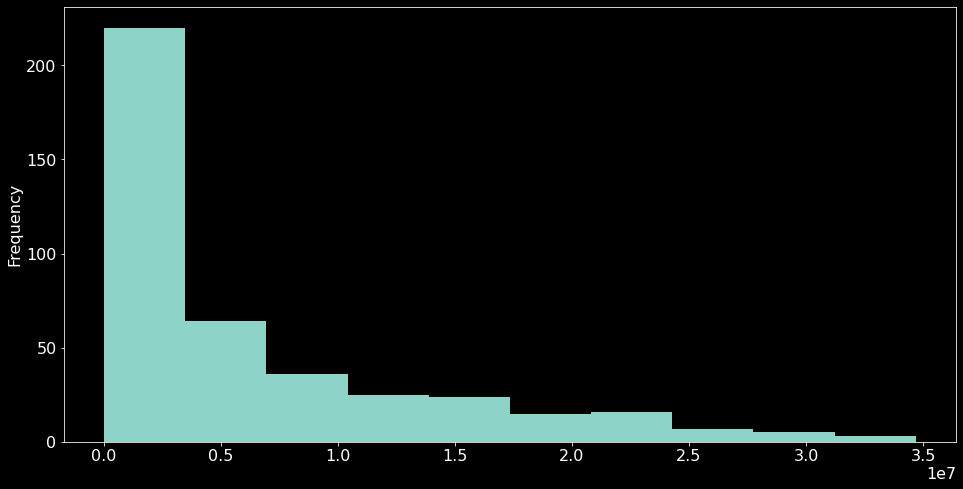

In [10]:
ss.salary.plot.hist()
plt.show()

## Which scoring aspect affects a players salary the most?

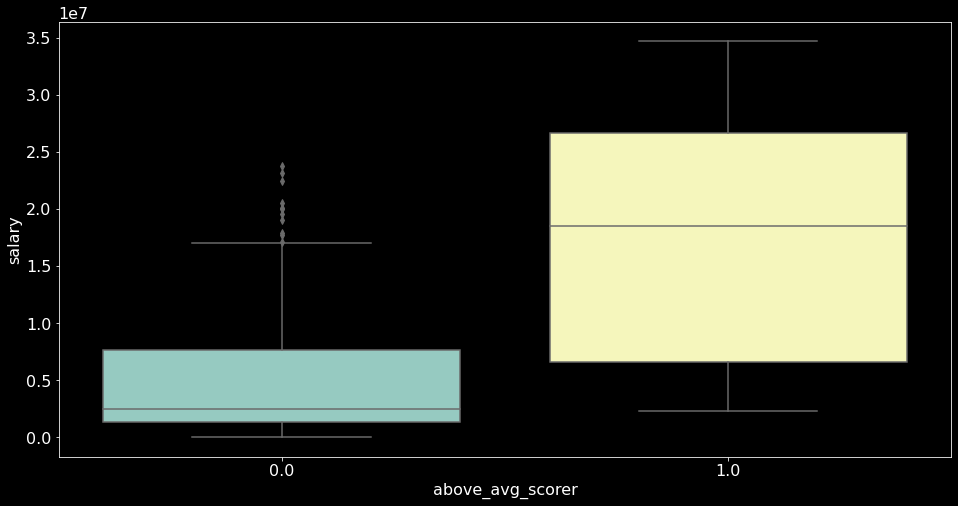

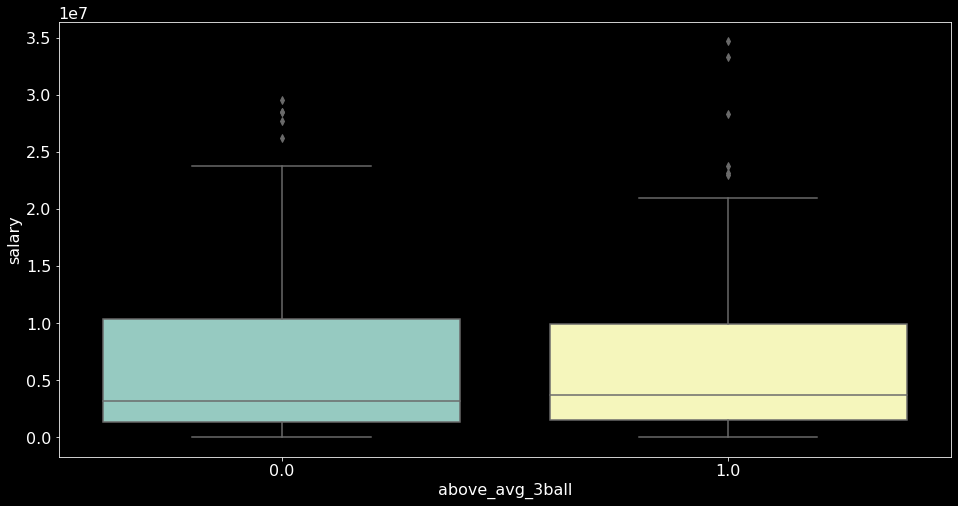

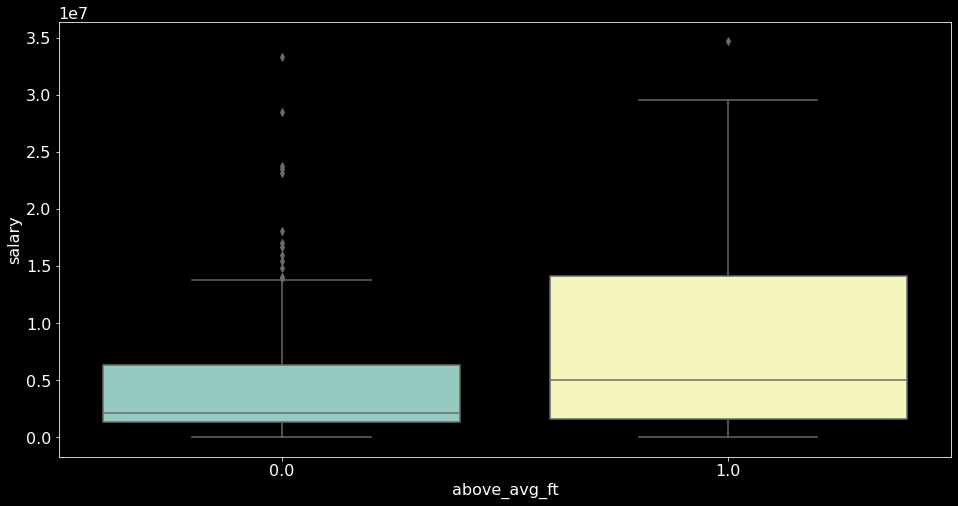

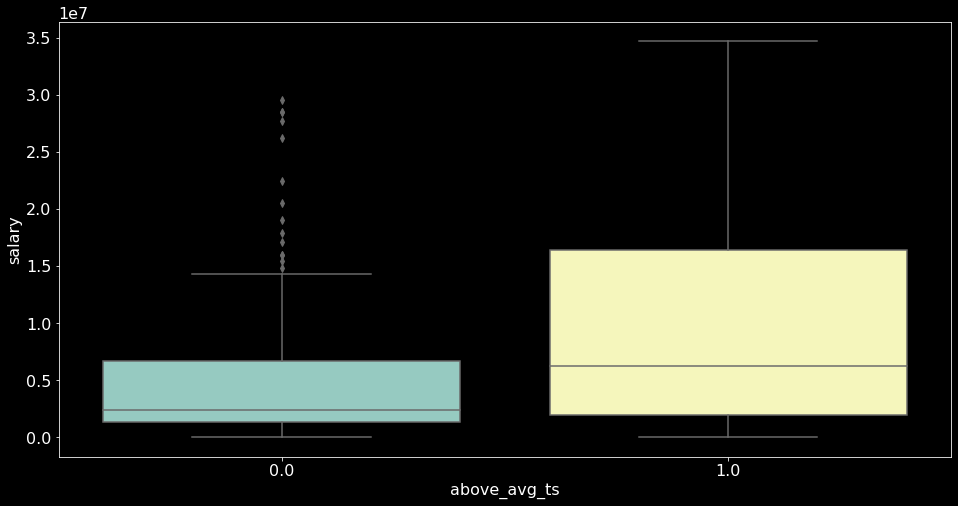

In [11]:
shooting_stats = ['above_avg_scorer','above_avg_3ball','above_avg_ft','above_avg_ts']

for i in shooting_stats:
    sns.boxplot(x=i, y='salary', data=train)
    plt.show()

### Takeaways
- It seems that all of the feature engineered statistics, being above the league average in a scoring metric will land you a higher salary than those who do fall below league average.

- The biggest difference in salary is between a player who is above league average in scoring and players who are not above league average.

- This follows common logic as teams will see players are both more efficient and score at a higher rate as more valuable than those who need more shots to score or do not score as efficiently.


#### Scoring statistical testing
(H_0): Players with an above avg TS% and PPG DO NOT earn a significantly different salary than then the rest of the league.

(H_a): Players with an above avg TS% and PPG DO earn a significantly different salary than then the rest of the league.

In [12]:
not_a_baller = ss[(ss.above_avg_scorer == 0)&(ss.above_avg_ts == 0)].salary
baller = ss[(ss.above_avg_scorer == 1)&(ss.above_avg_ts == 1)].salary

# Set alpha
alpha = 0.05

# Check for equal variances
s, pval = st.levene(baller, not_a_baller)

# Use the results from checking for equal variances to set equal_var
t, p = st.ttest_ind(baller, not_a_baller, equal_var=(pval >= alpha))

# Evaluate results based on the t-statistic and the p-value
if p/2 < alpha and t > 0:
    print('''Reject the Null Hypothesis.
    
Players with an above avg TS% and PPG DO earn a significantly different salary than then the rest of the league.''')
else:
    print('''Fail to reject the Null Hypothesis.
    
Players with an above avg TS% and PPG DO NOT earn a significantly different salary than then the rest of the league.''')

Reject the Null Hypothesis.
    
Players with an above avg TS% and PPG DO earn a significantly different salary than then the rest of the league.


## Does a players usage percentage affect their salary?


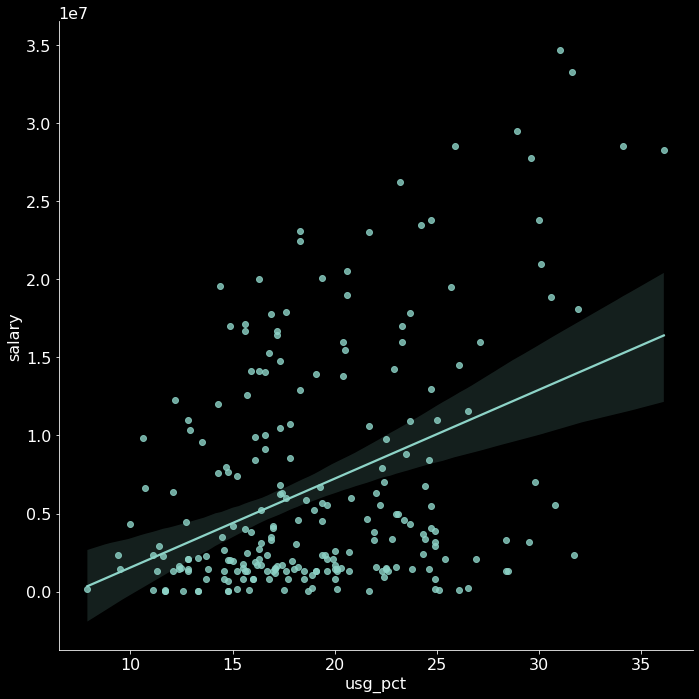

In [13]:
sns.lmplot(x='usg_pct', y='salary', data=train, height=10)
plt.show()

## Takeaways
- The reason for asking this question was to see if players who handled the ball more got paid more.

- It seems that be that there is some relationship between usgae percentage and salary.

- Perhaps teams see that if a player is to be running the offense more or handling the ball more they should be paid more to do so.

#### USG % statistical testing
(H_0): Players with an above avg USG % DO NOT earn a significantly different salary than then the rest of the league.

(H_a): Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.

In [14]:
notta_floor_general = ss[ss.above_avg_usg_pct == 0].salary
floor_general = ss[ss.above_avg_usg_pct == 1].salary

# Set alpha
alpha = 0.05

# Check for equal variances
s, pval = st.levene(floor_general, notta_floor_general)

# Use the results from checking for equal variances to set equal_var
t, p = st.ttest_ind(floor_general, notta_floor_general, equal_var=(pval >= alpha))

# Evaluate results based on the t-statistic and the p-value
if p/2 < alpha and t > 0:
    print('''Reject the Null Hypothesis.
    
Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.''')
else:
    print('''Fail to reject the Null Hypothesis.
    
Players with an above avg USG % DO NOT earn a significantly different salary than then the rest of the league.''')

Reject the Null Hypothesis.
    
Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.


## Does a players Box Plus Minus affect their salary?

To give a sense of the scale:

+10.0 is an all-time season (think peak Jordan or LeBron)
+8.0 is an MVP season
+6.0 is an all-NBA season
+4.0 is in all-star consideration
+2.0 is a good starter
+0.0 is a decent starter or solid 6th man
-2.0 is a bench player (this is also defined as "replacement level"


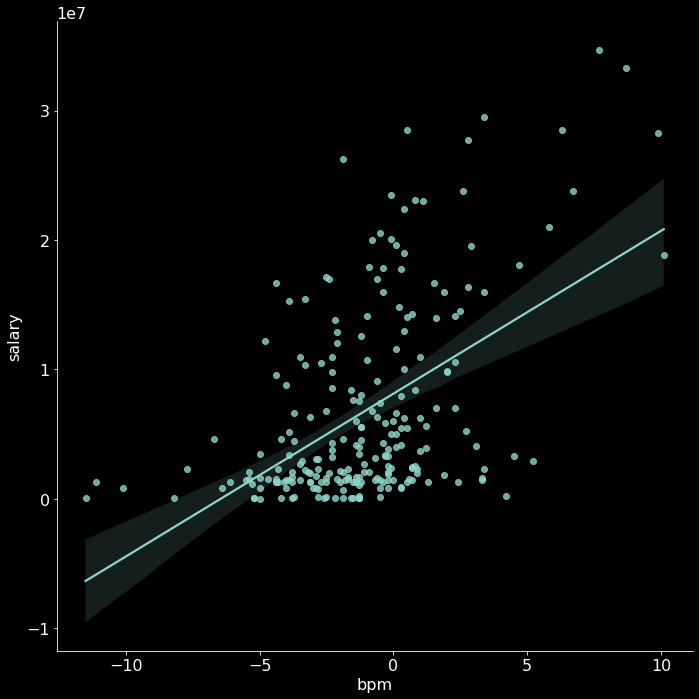

In [15]:
print(
    '''To give a sense of the scale:

+10.0 is an all-time season (think peak Jordan or LeBron)
+8.0 is an MVP season
+6.0 is an all-NBA season
+4.0 is in all-star consideration
+2.0 is a good starter
+0.0 is a decent starter or solid 6th man
-2.0 is a bench player (this is also defined as "replacement level"''')
sns.lmplot(x='bpm', y='salary', data=train, height=10)
plt.show()

### Takeaways
- With Box Plus minus being a stat the compares how a player affect's it's teams play it would make sense to think that players with higher BPM's also get paid more.
- Visually we can that that is the case, let's see if statistical testing can help prove that.

In [16]:
below_avg_bpm = ss[ss.bpm < ss.bpm.mean()].salary
above_avg_bpm = ss[ss.bpm >= ss.bpm.mean()].salary

# Set alpha
alpha = 0.05

# Check for equal variances
s, pval = st.levene(above_avg_bpm, below_avg_bpm)

# Use the results from checking for equal variances to set equal_var
t, p = st.ttest_ind(above_avg_bpm, below_avg_bpm, equal_var=(pval >= alpha))

# Evaluate results based on the t-statistic and the p-value
if p/2 < alpha and t > 0:
    print('''Reject the Null Hypothesis.
    
Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.''')
else:
    print('''Fail to reject the Null Hypothesis.
    
Players with an above avg USG % DO NOT earn a significantly different salary than then the rest of the league.''')

Reject the Null Hypothesis.
    
Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.


## Does position affect a players salary?

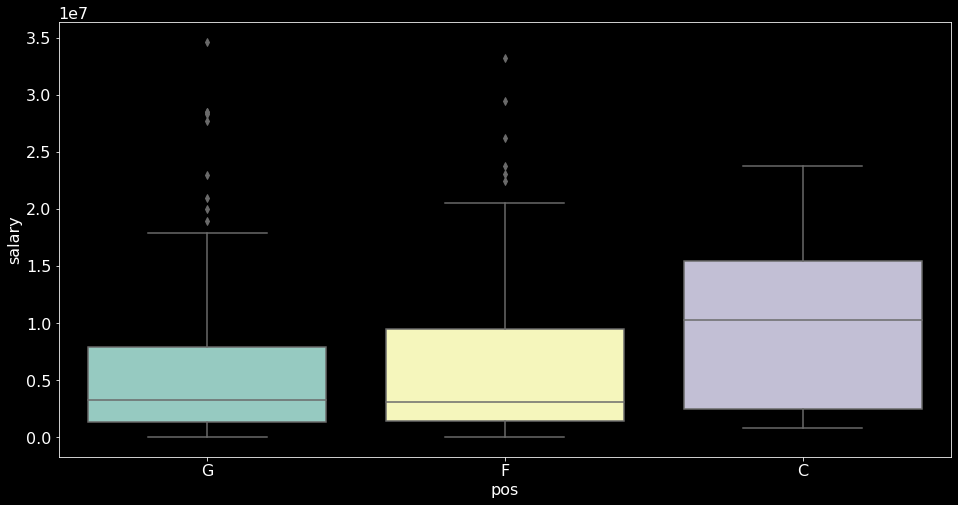

In [17]:
sns.boxplot(x='pos', y='salary', data=train)
plt.show()

### Takeaways
- Visually we see that players who are centers are paid more than those who are guards or wings.
- This goes against the common arguement that guards are more valuable in today's game.
- Let's see if statistical testing shows that or not.

#### USG % statistical testing
(H_0): Centers DO NOT make more than the league average.

(H_a): Centers DO make more than the league average.

In [18]:
centers_sal = train[train.pos == 'C'].salary
league_avg_sal = train.salary.mean()

# Set alpha
alpha = 0.05

t, p = st.ttest_1samp(centers_sal, league_avg_sal)

# Evaluate results based on the t-statistic and the p-value
if p/2 < alpha and t > 0:
    print('''Reject the Null Hypothesis.
    
Centers DO make more than the league average.''')
else:
    print('''Fail to reject the Null Hypothesis.
    
Centers DO NOT make more than the league average.''')

Reject the Null Hypothesis.
    
Centers DO make more than the league average.


## Exploration Summary

- Players with an above avg TS% and PPG DO earn a significantly different salary than then the rest of the league.

- Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.

- Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.

- We saw that a position that a player pays does have a impact on their salary.

# Modeling

In [19]:
x_train = train.drop(columns=['salary','pos'])
y_train = train.salary

x_val = val.drop(columns=['salary','pos'])
y_val = val.salary

x_test = test.drop(columns=['salary','pos'])
y_test = test.salary

y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)
y_test = pd.DataFrame(y_test)

In [20]:
pred_mean = y_train.salary.mean()
y_train['pred_mean'] = pred_mean
y_val['pred_mean'] = pred_mean
rmse_train = mean_squared_error(y_train.salary, y_train.pred_mean, squared=False)
rmse_validate = mean_squared_error(y_val.salary, y_val.pred_mean, squared=False)


# save the results
metric_df = pd.DataFrame(data=[{
    'model': 'baseline_mean',
    'rmse_train': rmse_train,
    'r2_train': explained_variance_score(y_train.salary, y_train.pred_mean),
    'rmse_validate': rmse_validate,
    'r2_validate': explained_variance_score(y_val.salary, y_val.pred_mean)
    }])

# LassoLars Model
lars = LassoLars(alpha=1)
lars.fit(x_train, y_train.salary)
y_train['pred_lars'] = lars.predict(x_train)
rmse_train = mean_squared_error(y_train.salary, y_train.pred_lars, squared=False)
y_val['pred_lars'] = lars.predict(x_val)
rmse_validate = mean_squared_error(y_val.salary, y_val.pred_lars, squared=False)

# save the results
metric_df = metric_df.append({
    'model': 'LarsLasso, alpha 1',
    'rmse_train': rmse_train,
    'r2_train': explained_variance_score(y_train.salary, y_train.pred_lars),
    'rmse_validate': rmse_validate,
    'r2_validate': explained_variance_score(y_val.salary, y_val.pred_lars)}, ignore_index=True)
metric_df

,model,rmse_train,r2_train,rmse_validate,r2_validate
0,baseline_mean,7519504.17,0.00,6809157.06,0.00
1,"LarsLasso, alpha 1",4355729.69,0.66,5202289.08,0.41


In [21]:
7,519,504.17
4,355,729.69
# Let's run a correlation test using the numeric features
from sklearn.model_selection import GridSearchCV

params = {'alpha': [1, 2, 3]}

model = LassoLars()

grid = GridSearchCV(model, params, cv=3)

grid.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=LassoLars(), param_grid={'alpha': [1, 2, 3]})

In [22]:
results = grid.cv_results_
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [23]:
test_scores = results['mean_test_score']
test_scores

array([0.50461599, 0.50489979, 0.50518147])

In [24]:
params = results['params']
params

[{'alpha': 1}, {'alpha': 2}, {'alpha': 3}]

In [25]:
for p, s in zip(params, test_scores):
    p['score'] = s

pd.DataFrame(params).sort_values(by='score')

,alpha,score
0,1,0.50
1,2,0.50
2,3,0.51
